## Regular Expressions

In [1]:
import re

In [2]:
my_string = "The quick! brown fox ? jumped. over the lazy dog saying 29."

In [3]:
#Pattern to match the sentence endings
sentence_endings = r"[.?!]"

In [4]:
# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

['The quick', ' brown fox ', ' jumped', ' over the lazy dog saying 29', '']


In [5]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['The']


In [6]:
# Split my_string on spaces and print the result
spaces=r"\s+"
print(re.split(spaces, my_string))

['The', 'quick!', 'brown', 'fox', '?', 'jumped.', 'over', 'the', 'lazy', 'dog', 'saying', '29.']


In [7]:
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

['29']


## Word Tokenization with nltk

In [8]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

/home/msivanes/miniconda3/envs/anlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
scene_one = '''The kubelet exposes metrics that can be collected and stored in back-ends by Heapster.As an OpenShift Container Platform administrator, you can view a cluster’s metrics from all containers and components in one user interface. These metrics are also used by horizontal pod autoscalers in order to determine when and how to scale.This topic describes using Hawkular Metrics as a metrics engine which stores the data persistently in a Cassandra database. When this is configured, CPU, memory and network-based metrics are viewable from the OpenShift Container Platform web console and are available for use by horizontal pod autoscalers.Heapster retrieves a list of all nodes from the master server, then contacts each node individually through the /stats endpoint. From there, Heapster scrapes the metrics for CPU, memory and network usage, then exports them into Hawkular Metrics.The storage volume metrics available on the kubelet are not available through the /stats endpoint, but are available through the /metrics endpoint. See OpenShift Container Platform via Prometheus for detailed information.Browsing individual pods in the web console displays separate sparkline charts for memory and CPU. The time range displayed is selectable, and these charts automatically update every 30 seconds. If there are multiple containers on the pod, then you can select a specific container to display its metrics.If resource limits are defined for your project, then you can also see a donut chart for each pod. The donut chart displays usage against the resource limit. For example: 145 Available of 200 MiB, with the donut chart showing 55 MiB Used.'''

In [14]:
scene_one = re.sub('\n', '', scene_one) #removing new lines

In [23]:
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

In [22]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

In [21]:
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens=set(word_tokenize(scene_one))
print(unique_tokens)

{'project', 'resource', 'used', '30', 'Metrics.The', 'donut', '200', 'From', 'use', 'horizontal', 'OpenShift', 'displayed', 'an', 'view', 'every', 'cluster', 'through', 'determine', 'Heapster', 'scrapes', 'these', 'console', 'chart', 'volume', 'Platform', 'select', 'selectable', 'your', 'all', 'as', 'For', 'memory', 'metrics', 'of', '55', 'describes', 'limit', 'each', '145', 'displays', 'range', 'also', 'components', 'network', 'for', 'See', 'administrator', 'by', 'autoscalers', 'when', 'you', 'Heapster.As', 'metrics.If', 'is', 'and', 'in', 'order', 'update', 'are', 'with', 'endpoint', 'exports', 'there', 'stores', ':', 'charts', 'collected', 'containers', 'how', 'them', 'When', 'specific', 'be', 'pod', 's', 'If', 'automatically', 'back-ends', 'autoscalers.Heapster', 'example', 'against', 'Available', 'viewable', 'storage', 'master', 'These', 'exposes', '/stats', 'interface', 'available', 'that', 'configured', 'scale.This', 'using', 'Container', 'via', 'showing', 'Metrics', 'user', 'da

In [28]:
#Loading Monty Python corpus from grail.txt nltk corpora 
# https://stackoverflow.com/questions/49283774/how-to-read-nltk-text-text-files-from-nltk-book-in-python
from nltk.corpus import webtext

In [27]:
scene_one = webtext.raw('grail.txt')

In [36]:
sentences = sent_tokenize(scene_one)

In [29]:
## Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

In [30]:
# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [41]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

In [32]:
# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<_sre.SRE_Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [37]:
sentences[3]

'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.'

In [40]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<_sre.SRE_Match object; span=(0, 7), match='ARTHUR:'>


### Choosing the tokenizer using regular expression

In [44]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

In [45]:
from nltk.tokenize import regexp_tokenize

In [54]:
pattern1 = r"\w+(\?!)"
pattern2 = r"(\w+|#\d|\?|!)"
pattern3 = r"(#\d\w+\?!)"
pattern4 = r"\s+"

In [56]:
regexp_tokenize(my_string, pattern2)

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

### Regex with NLTK tokenization

In [58]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import regexp_tokenize

In [59]:
tweets = ["This is the best #nlp exercise ive found online! #python",
         "#NLP is super fun! <3 #learning",
         "Thanks @datacamp :) #nlp #python"]

In [60]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

In [61]:
# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0], pattern1)

['#nlp', '#python']

In [62]:
# Write a pattern that matches both mentions and hashtags
pattern2 = r"([@|#]\w+)"

In [63]:
# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[-1], pattern2)

['@datacamp', '#nlp', '#python']

In [64]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


### Non-ascii tokenization

In [65]:
german_text = "Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕"

In [67]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [71]:
# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


In [70]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


### Charting

In [88]:
from matplotlib import pyplot as plt

In [72]:
holy_grail = webtext.raw('grail.txt')

In [74]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

In [79]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

In [83]:
# Tokenize each line: tokenized_lines
tokenized_lines = [ regexp_tokenize(s, r"\w+") for s in lines]

In [85]:
# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

(array([916., 177.,  52.,  22.,   9.,   4.,   4.,   5.,   1.,   2.]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <a list of 10 Patch objects>)

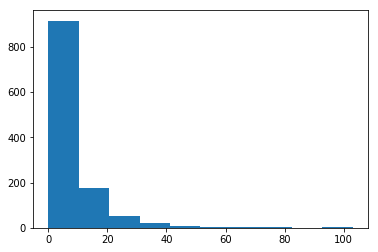

In [89]:
# Plot a histogram of the line lengths
plt.hist(line_num_words)

In [90]:
plt.show()